# Analyze Implicit Benchmark results using statistics

In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data_dir = '../Claudius/AllResults/'
file='AccurateIsoDistance1.csv'
distance_files = ['AccurateIsoDistance.csv']


## Analyze distances
Start by extracting the histograms 

In [170]:

#for file in distance_files:
filename = data_dir + file;
data = pd.read_csv( filename, sep=';' );
#data = data.set_index('Property')

def extract_cdf( data ):
    deciles = np.linspace(0.1, 0.9, 9 )
    def decile_key( decile ) :
        return 'P' + str(int(decile*100))

    print(  data.shape[0] )
    decile_names = [decile_key(decile) for decile in deciles]
    decile_names.insert(0, 'Min')
    decile_names.append('Max')
    pdfx_names = ['pdfx'+str(i) for i in range(12) ]
    pdfy_names = ['pdfy'+str(i) for i in range(12) ]
    cdfdata = data[[decile for decile in decile_names]]
    
    pdfdata = pd.DataFrame([0. for i in range( data.shape[0])], columns=['pdfminy'])
    pdfdata.insert(0, 'pdfminx', cdfdata['Min'] )
    for col in range(1, 11):
        pdfy = 0.1/(cdfdata[decile_names[col]] - cdfdata[decile_names[col-1]])
        pdfx = (cdfdata[decile_names[col]] + cdfdata[decile_names[col-1]])/2
        pdfdata.insert(2*col, pdfx_names[col], pdfx )
        pdfdata.insert(2*col+1, pdfy_names[col], pdfy )
    
    pdfdata.insert(22, 'pdfmaxx', cdfdata['Max'] )
    pdfdata['pdfmaxy'] = 0.
        #pdfdata[decile_names[col]] = cdfdata[decile_names[col]] - cdfdata[decile_names[col-1]]
    return cdfdata, pdfdata

cdfdata, pdfdata = extract_cdf( data )
data


65


,Object,Region,Property,Min,Max,Mean,Std_dev,P10,P20,P30,P40,P50,P60,P70,P80,P90,Unnamed: 16
0,HorizB_Validation,everywhere,GemPy0_029_HorizB_,-26.878784,33.590675,-0.266497,6.249853,-7.262294,-5.005542,-3.308821,-1.854407,-0.679196,0.659524,2.171478,4.282793,7.272237,0
1,HorizB_Validation,everywhere,JulienBendingMLS60_000_HorizB_,-9.416915,8.870339,-0.798779,1.676933,-2.689141,-2.004406,-1.571310,-1.195050,-0.836003,-0.548317,-0.134355,0.348895,1.138079,0
2,HorizB_Validation,everywhere,JulienBendingMLS_Fine60_000_HorizB_,-6.567991,26.507332,9.910680,3.635244,5.483644,7.384660,8.529544,9.362701,10.135852,10.814832,11.527841,12.464647,13.898054,0
3,HorizB_Validation,everywhere,LoopStructural_FDI60_000_HorizB_,-50.106571,21.454308,-9.647176,7.459253,-18.313400,-15.188889,-13.025331,-11.369765,-9.868785,-8.259727,-6.531470,-4.422936,-0.898209,0
4,HorizB_Validation,everywhere,LoopStructural_PLI60_000_HorizB_,-34.651001,19.913681,-2.505876,6.060875,-9.647692,-7.214982,-5.471839,-3.949521,-2.572483,-1.219252,0.393833,2.137254,5.014049,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,HorizA_Validation,everywhere,SurfE_MQ1_Exact_ALL129_258_HorizA_,-9.918591,5.605127,-0.032539,1.560418,-1.877295,-1.119012,-0.610613,-0.253512,0.043988,0.371260,0.709789,1.124207,1.736460,0
61,HorizA_Validation,everywhere,SurfE_MQ1_Smooth-156923_070_HorizA_,-50.811882,122.241516,0.007327,21.840369,-22.153421,-15.689273,-11.220269,-7.352962,-4.203628,0.673617,7.452565,14.356331,24.123774,0
62,HorizA_Validation,everywhere,SurfE_MQ1_SmootALL-10911_103_HorizA_,-305.447632,323.892792,-1.104451,109.202922,-144.782620,-103.212679,-68.529486,-33.978535,-1.341195,32.544548,65.216632,97.743567,143.676425,0
63,HorizA_Validation,everywhere,SurfE_R3_Exact-23287_519_HorizA_,-163.505554,213.413544,3.303816,13.814695,-7.175271,-4.171476,-2.243419,-0.170674,2.006019,3.994678,6.151236,9.460851,18.537271,0


In [171]:
numpypdf = pdfdata.to_numpy()
data

,Object,Region,Property,Min,Max,Mean,Std_dev,P10,P20,P30,P40,P50,P60,P70,P80,P90,Unnamed: 16
0,HorizB_Validation,everywhere,GemPy0_029_HorizB_,-26.878784,33.590675,-0.266497,6.249853,-7.262294,-5.005542,-3.308821,-1.854407,-0.679196,0.659524,2.171478,4.282793,7.272237,0
1,HorizB_Validation,everywhere,JulienBendingMLS60_000_HorizB_,-9.416915,8.870339,-0.798779,1.676933,-2.689141,-2.004406,-1.571310,-1.195050,-0.836003,-0.548317,-0.134355,0.348895,1.138079,0
2,HorizB_Validation,everywhere,JulienBendingMLS_Fine60_000_HorizB_,-6.567991,26.507332,9.910680,3.635244,5.483644,7.384660,8.529544,9.362701,10.135852,10.814832,11.527841,12.464647,13.898054,0
3,HorizB_Validation,everywhere,LoopStructural_FDI60_000_HorizB_,-50.106571,21.454308,-9.647176,7.459253,-18.313400,-15.188889,-13.025331,-11.369765,-9.868785,-8.259727,-6.531470,-4.422936,-0.898209,0
4,HorizB_Validation,everywhere,LoopStructural_PLI60_000_HorizB_,-34.651001,19.913681,-2.505876,6.060875,-9.647692,-7.214982,-5.471839,-3.949521,-2.572483,-1.219252,0.393833,2.137254,5.014049,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,HorizA_Validation,everywhere,SurfE_MQ1_Exact_ALL129_258_HorizA_,-9.918591,5.605127,-0.032539,1.560418,-1.877295,-1.119012,-0.610613,-0.253512,0.043988,0.371260,0.709789,1.124207,1.736460,0
61,HorizA_Validation,everywhere,SurfE_MQ1_Smooth-156923_070_HorizA_,-50.811882,122.241516,0.007327,21.840369,-22.153421,-15.689273,-11.220269,-7.352962,-4.203628,0.673617,7.452565,14.356331,24.123774,0
62,HorizA_Validation,everywhere,SurfE_MQ1_SmootALL-10911_103_HorizA_,-305.447632,323.892792,-1.104451,109.202922,-144.782620,-103.212679,-68.529486,-33.978535,-1.341195,32.544548,65.216632,97.743567,143.676425,0
63,HorizA_Validation,everywhere,SurfE_R3_Exact-23287_519_HorizA_,-163.505554,213.413544,3.303816,13.814695,-7.175271,-4.171476,-2.243419,-0.170674,2.006019,3.994678,6.151236,9.460851,18.537271,0


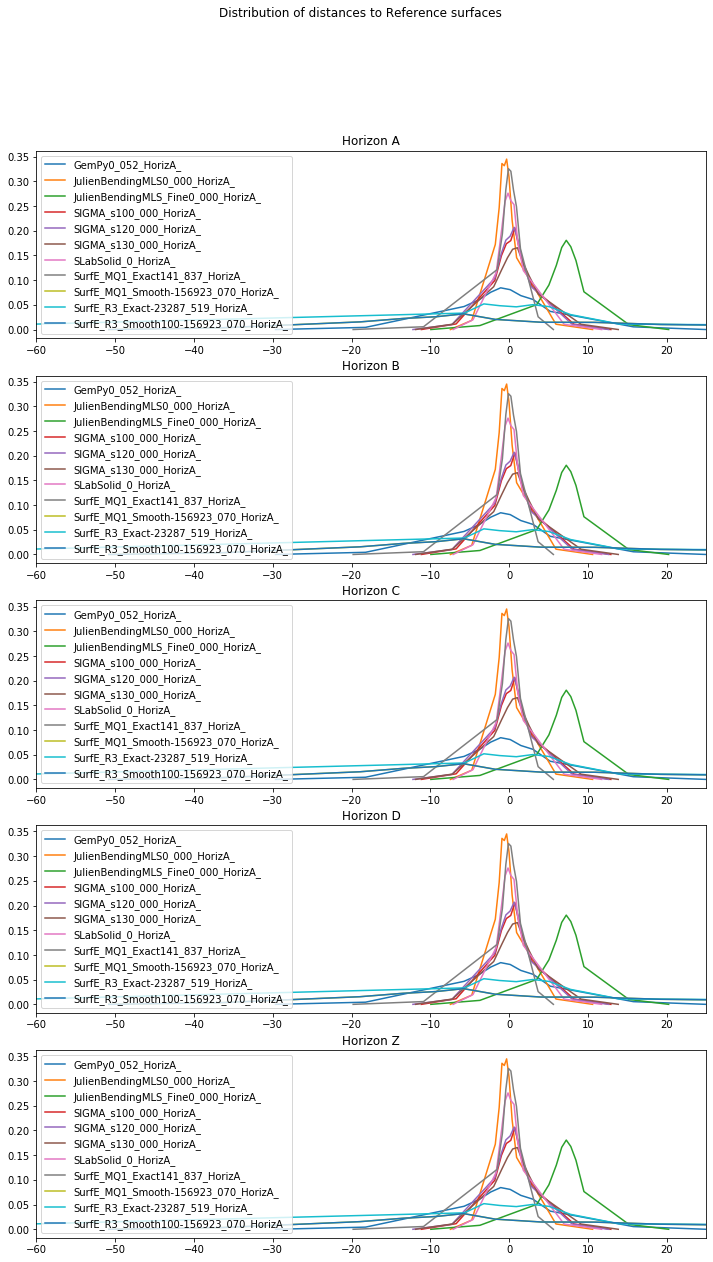

In [191]:
   
fig, axs = plt.subplots(5,1)
fig.suptitle('Distribution of distances to Reference surfaces')
#fig = plt.figure(figsize=(12,12))
plt.setp(axs, xlim=(-60,25))
fig.set_figheight(20)
fig.set_figwidth(12)
for i in range(65):
    method = data['Property'][i]
    if 'HorizA' in method and 'ALL' not in method and 'Structural' not in method:
        axs[0 ].plot(numpypdf[i][::2], numpypdf[i][1::2], label=data['Property'][i])
        axs[0 ].set_title( 'Horizon A' )
        axs[0].legend()
    if 'HorizA' in method and 'ALL' not in method and 'Structural' not in method:
        axs[1].plot(numpypdf[i][::2], numpypdf[i][1::2], label=data['Property'][i])
        axs[1].set_title( 'Horizon B' )
        axs[1].legend()
    if 'HorizA' in method and 'ALL' not in method and 'Structural' not in method:
        axs[2].plot(numpypdf[i][::2], numpypdf[i][1::2], label=data['Property'][i])
        axs[2].set_title( 'Horizon C' )
        axs[2].legend()
    if 'HorizA' in method and 'ALL' not in method and 'Structural' not in method:
        axs[3].plot(numpypdf[i][::2], numpypdf[i][1::2], label=data['Property'][i])
        axs[3].set_title( 'Horizon D' )
        axs[3].legend()
    if 'HorizA' in method and 'ALL' not in method and 'Structural' not in method:
        axs[4].plot(numpypdf[i][::2], numpypdf[i][1::2], label=data['Property'][i])
        axs[4].set_title( 'Horizon Z' )        
        axs[4].legend()
#plt.figlegend()
plt.show()

In [125]:

data['Property'][2]


'H_JulienBendingMLS_Fine60_000_HorizB_Validation_error (m)'

In [151]:
type(axs[0, 0])

matplotlib.axes._subplots.AxesSubplot